In [ ]:
%cd drive/MyDrive/Colab\ Notebooks/HouseholdDebt

/content/drive/MyDrive/Colab Notebooks/HouseholdDebt


# 한글세팅

In [ ]:
!sudo apt-get update -qq
!sudo apt-get install fonts-nanum* -qq

In [ ]:
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

NanumBarunGothic


In [ ]:
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
import seaborn as sns

In [ ]:
sns.set(font=font_name, 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [ ]:
import pandas as pd

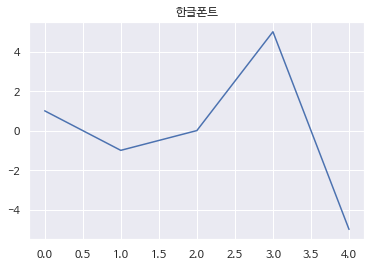

In [ ]:
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")
None

In [ ]:
!pip install statsmodels --upgrade

# 20대 전세자금대출


In [ ]:
import numpy as np
import statsmodels as sm
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.statespace.dynamic_factor_mq import DynamicFactorMQ

## Data load

### Macro data load

In [ ]:
df = pd.read_csv('data/all_monthly_macro_data.csv', index_col=0)

In [ ]:
df = df.join([pd.read_csv('data/charter_monthly_macro_data.csv', index_col=0)])

In [ ]:
df_ur = pd.read_csv('data/월별_성_연령별_실업률.csv')

In [ ]:
df['unemployment_rate'] = list(df_ur[(df_ur['성별']=='계') & (df_ur['연령계층별']=='20 - 29세')]['데이터'])[:-3]

In [ ]:
df = df.set_index(pd.date_range(start='2010-01-31', end='2021-09-30', freq='M'))

### Loan data load

In [ ]:
df_loan = pd.read_csv('data/house_loan.csv')

In [ ]:
df_charter_loan = pd.DataFrame(data=df_loan[(df_loan['연령대'] == '20대') & (df_loan['상품구분(KFB)명'].isin(['전세자금(보증서, 질권 등)대출', '전세자금대출', '전세보증금담보대출']))].groupby('기준분기').sum()['대출금액합계<미적용, 십만원>'])

In [ ]:
df_charter_loan = df_charter_loan.rename(columns={'대출금액합계<미적용, 십만원>':'charter_loan_20'}).set_index(pd.date_range(start='2017-09-30', end='2021-09-30', freq='Q'))

In [ ]:
# df['charter_loan_20'] = df_loan[(df_loan['연령대'] == '20대') & (df_loan['상품구분(KFB)명'].isin(['전세자금(보증서, 질권 등)대출', '전세자금대출', '전세보증금담보대출']))].groupby('기준분기').sum()['대출금액합계<미적용, 십만원>']

### Convert YoY

In [ ]:
def convert_to_yoy(df, freq):
  a = np.array(df)
  df_yoy = pd.DataFrame(data=((a[freq:] - a[:-freq]) / a[:-freq]) ,index=df.index[freq:], columns=df.columns)
  return df_yoy

In [ ]:
df_monthly_yoy = convert_to_yoy(df, 12)

In [ ]:
len(df_monthly_yoy)

129

In [ ]:
df_quarterly_yoy = convert_to_yoy(df_charter_loan, 4)

In [ ]:
df_quarterly_yoy

,charter_loan_20
2018-09-30,0.606373
2018-12-31,0.664863
2019-03-31,0.428404
2019-06-30,0.610859
2019-09-30,0.776450
2019-12-31,0.730202
2020-03-31,1.182776
2020-06-30,0.984251
2020-09-30,0.788753
2020-12-31,0.778659


### Visualization

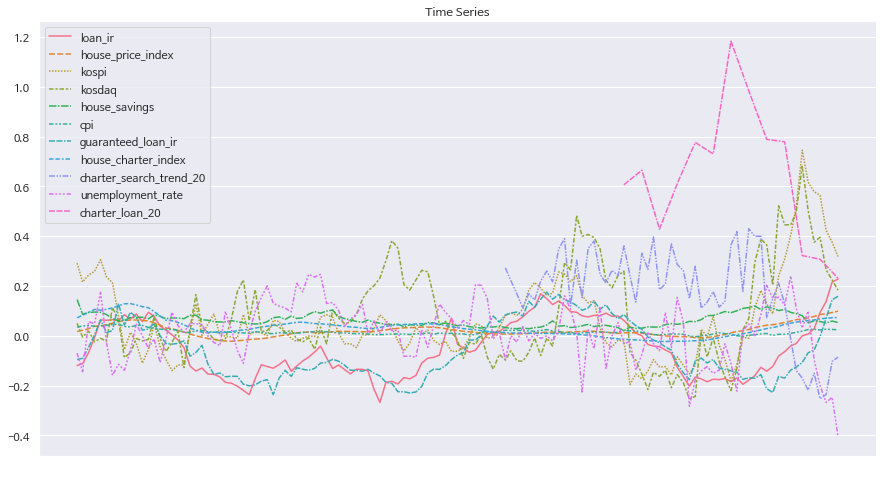

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_monthly_yoy.join([df_quarterly_yoy]))
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 12 != 0:
        xticks[i].set_visible(False)
plt.show()
None

### Select variable and cut

In [ ]:
df_monthly_yoy = df_monthly_yoy[['house_savings', 'guaranteed_loan_ir', 'unemployment_rate', 'cpi', 'house_charter_index', 'charter_search_trend_20']]

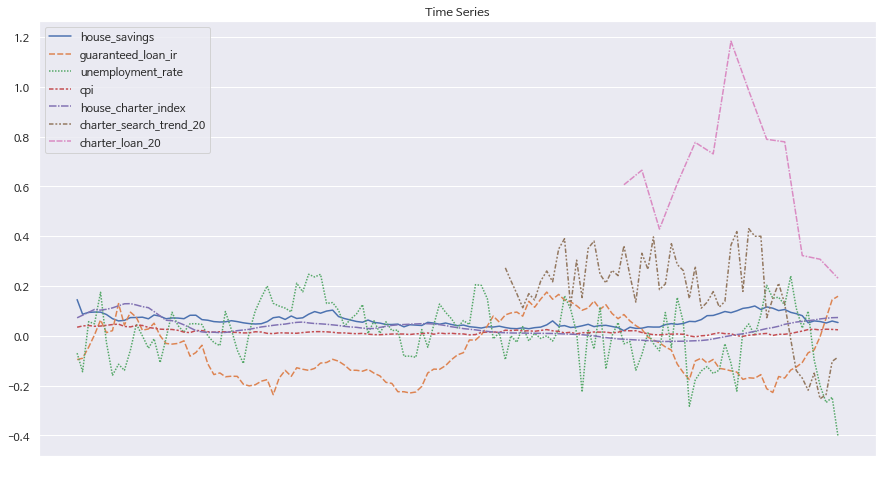

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_monthly_yoy.join([df_quarterly_yoy]))
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 12 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
df_monthly_yoy = df_monthly_yoy[92:]

In [ ]:
df_monthly_yoy

,house_savings,guaranteed_loan_ir,unemployment_rate,cpi,house_charter_index,charter_search_trend_20
2018-09-30,0.020338,0.085366,-0.032258,0.020872,-0.013949,0.361187
2018-10-31,0.034408,0.059347,-0.022989,0.020025,-0.015020,0.241528
2018-11-30,0.029779,0.040816,-0.138298,0.020370,-0.016391,0.134998
2018-12-31,0.030545,0.025788,-0.075269,0.013204,-0.017966,0.331438
2019-01-31,0.036010,-0.005525,0.011628,0.007930,-0.019640,0.266412
2019-02-28,0.034989,-0.016901,-0.031250,0.004613,-0.020937,0.396972
2019-03-31,0.035086,-0.027933,-0.060345,0.003747,-0.022044,0.185480
2019-04-30,0.044750,-0.044568,0.093458,0.005559,-0.023004,0.208059
2019-05-31,0.048744,-0.057692,-0.047170,0.006799,-0.022435,0.369842
2019-06-30,0.045975,-0.113573,0.153846,0.007208,-0.022028,0.286234


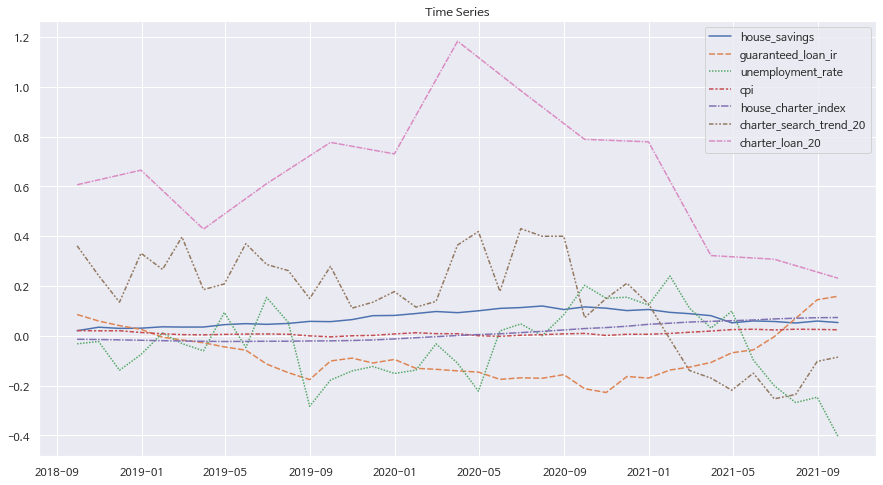

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_monthly_yoy.join([df_quarterly_yoy]))
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
plt.show()
None

## Unit root test

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
for name, column in df_monthly_yoy.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "house_savings" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.172
 No. Lags Chosen       = 5
 Critical value 1%     = -3.661
 Critical value 5%     = -2.961
 Critical value 10%    = -2.619
 => P-Value = 0.2165. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "guaranteed_loan_ir" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.2998
 No. Lags Chosen       = 0
 Critical value 1%     = -3.627
 Critical value 5%     = -2.946
 Critical value 10%    = -2.612
 => P-Value = 0.9255. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "unemployment_rate" 
    -----------------------------------------------

In [ ]:
for name, column in df_quarterly_yoy.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "charter_loan_20" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.0263
 No. Lags Chosen       = 3
 Critical value 1%     = -4.473
 Critical value 5%     = -3.29
 Critical value 10%    = -2.772
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




## Granger's causality

In [ ]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', maxlag=12, verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [ ]:
grangers_causation_matrix(df_for_grangers, variables = df.columns, maxlag=12)

,house_savings_x,guaranteed_loan_ir_x,unemployment_rate_x,cpi_x,house_charter_index_x,charter_search_trend_20_x,charter_loan_20_x
house_savings_y,1.0000,0.0978,0.000,0.0000,0.0000,0.0000,0.0000
guaranteed_loan_ir_y,0.0000,1.0000,0.000,0.0000,0.0000,0.0000,0.0000
unemployment_rate_y,0.0000,0.0003,1.000,0.0000,0.0059,0.0000,0.0008
cpi_y,0.0057,0.0004,0.000,1.0000,0.1469,0.0000,0.0000
house_charter_index_y,0.0005,0.0000,0.000,0.0000,1.0000,0.0024,0.0000
charter_search_trend_20_y,0.0026,0.0000,0.014,0.0000,0.0000,1.0000,0.0000
charter_loan_20_y,0.0000,0.0000,0.000,0.0022,0.0000,0.0000,1.0000


## Reorder variable

In [ ]:
df.columns

Index(['house_savings', 'guaranteed_loan_ir', 'unemployment_rate', 'cpi',
       'house_charter_index', 'charter_search_trend_20', 'charter_loan_20'],
      dtype='object')

In [ ]:
df = df[['unemployment_rate', 'house_savings', 'cpi', 'guaranteed_loan_ir', 'house_charter_index', 'charter_search_trend_20', 'charter_loan_20']]

In [ ]:
df

,unemployment_rate,house_savings,cpi,guaranteed_loan_ir,house_charter_index,charter_search_trend_20,charter_loan_20
2017-09-30,9.3,13.311549,4.586721,3.28,4.558418,3.788580,14.075471
2017-10-31,8.7,13.294092,4.585753,3.37,4.558975,4.010177,14.048375
2017-11-30,9.4,13.294265,4.578282,3.43,4.559445,4.037353,14.082390
2017-12-31,9.3,13.304871,4.581881,3.49,4.559171,3.988102,14.153782
2018-01-31,8.6,13.306913,4.586049,3.62,4.558693,4.229605,14.238651
2018-02-28,9.6,13.316718,4.593654,3.55,4.557797,3.993026,14.318218
2018-03-31,11.6,13.328311,4.592602,3.58,4.556453,4.049060,14.378819
2018-04-30,10.7,13.325537,4.594423,3.59,4.554531,3.900342,14.413914
2018-05-31,10.6,13.320535,4.594908,3.64,4.551771,3.908596,14.433926
2018-06-30,9.1,13.329274,4.592885,3.61,4.549249,3.894047,14.451752


In [ ]:
df.columns

Index(['unemployment_rate', 'house_savings', 'cpi', 'guaranteed_loan_ir',
       'house_charter_index', 'charter_search_trend_20', 'charter_loan_20'],
      dtype='object')

## Cointegration rank

In [ ]:
def cointegration_test(df, det_order=-1, k_ar_diff=5, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df, det_order=det_order,k_ar_diff=k_ar_diff)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [ ]:
cointegration_test(df.drop(stationary_cols_diff_0, axis=1), -1, 3)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
house_savings ::  119.61    > 60.0627   =>   True
cpi    ::  73.41     > 40.1749   =>   True
guaranteed_loan_ir ::  38.93     > 24.2761   =>   True
charter_search_trend_20 ::  13.04     > 12.3212   =>   True
charter_loan_20 ::  1.92      > 4.1296    =>   False


In [ ]:
rank_test = select_coint_rank(df.drop(stationary_cols_diff_0, axis=1), -1, 3, method="trace",
                              signif=0.05)
rank_test.rank

4

In [ ]:
rank_test.summary()

r_0,r_1,test statistic,critical value
0,5,119.6,60.06
1,5,73.41,40.17
2,5,38.93,24.28
3,5,13.04,12.32
4,5,1.924,4.130


## Model build

In [ ]:
mod = DynamicFactorMQ(df_monthly_yoy, endog_quarterly=df_quarterly_yoy)

In [ ]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Model Specification: Dynamic Factor Model                         
===========================================================================================
Model:                Dynamic Factor Model   # of monthly variables:                      6
                   + 1 factors in 1 blocks   # of quarterly variables:                    1
                   + Mixed frequency (M/Q)   # of factors:                                1
                     + AR(1) idiosyncratic   Idiosyncratic disturbances:              AR(1)
Sample:                            2018-09   Standardize variables:                    True
                                 - 2021-09                                                 
Observed variables / factor loadings
==================================
          Dep. variable          0
----------------------------------
          house_savings          X
     guaranteed_loan_ir          X
      unemployment_rate          X
                    cpi          X
    house_charter_index          X
charter_search_trend_20          X
        charter_loan_20          X
    Factor blocks:   
=====================
     block      order
---------------------
         0          1
=====================
"""

## Parameter estimation

In [ ]:
res = mod.fit(disp=10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


EM start iterations, llf=-151.24
EM iteration 10, llf=-83.946, convergence criterion=0.062651
EM iteration 20, llf=-79.431, convergence criterion=0.00079511
EM iteration 30, llf=-78.913, convergence criterion=0.00052126
EM iteration 40, llf=-78.588, convergence criterion=0.00035247
EM iteration 50, llf=-78.341, convergence criterion=0.00029126
EM iteration 60, llf=-78.129, convergence criterion=0.00025721
EM iteration 70, llf=-77.938, convergence criterion=0.00023398
EM iteration 80, llf=-77.764, convergence criterion=0.00021691
EM iteration 90, llf=-77.601, convergence criterion=0.00020364
EM iteration 100, llf=-77.448, convergence criterion=0.00019268
EM iteration 110, llf=-77.303, convergence criterion=0.00018299
EM iteration 120, llf=-77.166, convergence criterion=0.00017384
EM iteration 130, llf=-77.035, convergence criterion=0.00016472
EM iteration 140, llf=-76.913, convergence criterion=0.00015531
EM iteration 150, llf=-76.797, convergence criterion=0.00014542
EM iteration 160, 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/dynamic_factor_mq.py:2688: UserWarning: EM reached maximum number of iterations (500), without achieving convergence: llf=-75.769, convergence criterion=4.8904e-06 (while specified tolerance was 1e-06)
  warn(f'EM reached maximum number of iterations ({maxiter}),'


In [ ]:
res.summary()

Dep. Variable:,"""house_savings"", and 6 more",No. Observations:,37
Model:,Dynamic Factor Model,Log Likelihood,-75.768
,+ 1 factors in 1 blocks,AIC,197.536
,+ Mixed frequency (M/Q),BIC,234.587
,+ AR(1) idiosyncratic,HQIC,210.599
Date:,"Tue, 15 Feb 2022",EM Iterations,500
Time:,07:34:41,,
Sample:,09-30-2018,,
,- 09-30-2021,,
Covariance Type:,Not computed,,
Factor loadings:,0,idiosyncratic: AR(1),var.


## Forecasts

In [ ]:
res.forecast(steps=12)

,house_savings,guaranteed_loan_ir,unemployment_rate,cpi,house_charter_index,charter_search_trend_20,charter_loan_20
2021-10,0.047042,0.182915,-0.392357,0.027304,0.078612,-0.176343,0.161691
2021-11,0.040465,0.209585,-0.391176,0.030662,0.084455,-0.257846,0.085832
2021-12,0.033400,0.238995,-0.399075,0.034226,0.090915,-0.334319,0.006070
2022-01,0.025788,0.271425,-0.414727,0.038030,0.098054,-0.408971,-0.077640
2022-02,0.017564,0.307185,-0.437219,0.042108,0.105943,-0.484305,-0.166022
2022-03,0.008660,0.346617,-0.465966,0.046499,0.114657,-0.562330,-0.260227
2022-04,-0.001003,0.390095,-0.500640,0.051244,0.124282,-0.644723,-0.361596
2022-05,-0.011509,0.438034,-0.541116,0.056387,0.134909,-0.732942,-0.471437
2022-06,-0.022950,0.490893,-0.587437,0.061977,0.146641,-0.828314,-0.591059
2022-07,-0.035430,0.549174,-0.639785,0.068066,0.159591,-0.932097,-0.721806


Text(0.5, 1.0, 'Forecast')

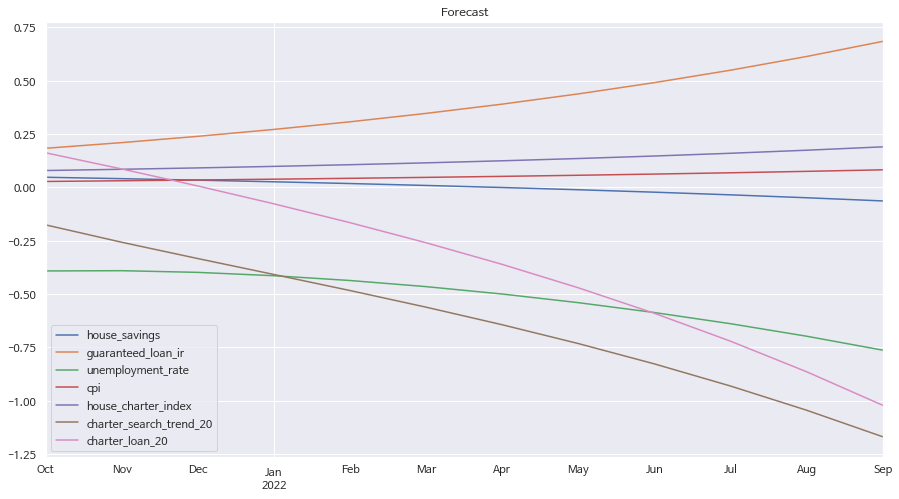

In [ ]:
res.forecast(steps=12).plot(figsize=(15,8)).set_title('Forecast')

## Structural analysis

### Impulse response analysis

In [ ]:
res.impulse_responses(steps=12, impulse='house_savings')

,house_savings,guaranteed_loan_ir,unemployment_rate,cpi,house_charter_index,charter_search_trend_20,charter_loan_20
0,-0.009507,0.047770,-0.045160,0.004696,0.010713,-0.082913,-0.014087
1,-0.010482,0.052668,-0.049790,0.005178,0.011811,-0.091413,-0.043705
2,-0.011556,0.058067,-0.054894,0.005709,0.013022,-0.100785,-0.090445
3,-0.012741,0.064020,-0.060522,0.006294,0.014357,-0.111117,-0.127891
4,-0.014047,0.070583,-0.066726,0.006939,0.015829,-0.122509,-0.155089
5,-0.015487,0.077819,-0.073567,0.007651,0.017452,-0.135068,-0.170989
6,-0.017075,0.085797,-0.081109,0.008435,0.019241,-0.148915,-0.188518
7,-0.018825,0.094593,-0.089424,0.009300,0.021214,-0.164181,-0.207844
8,-0.020755,0.104290,-0.098592,0.010253,0.023388,-0.181013,-0.229152
9,-0.022883,0.114982,-0.108699,0.011304,0.025786,-0.199570,-0.252644


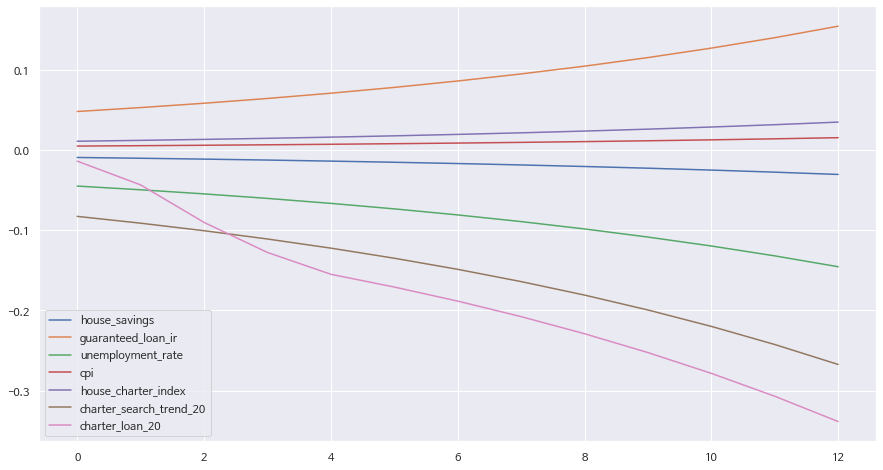

In [ ]:
res.impulse_responses(steps=12, impulse='house_savings').plot(figsize=(15,8))

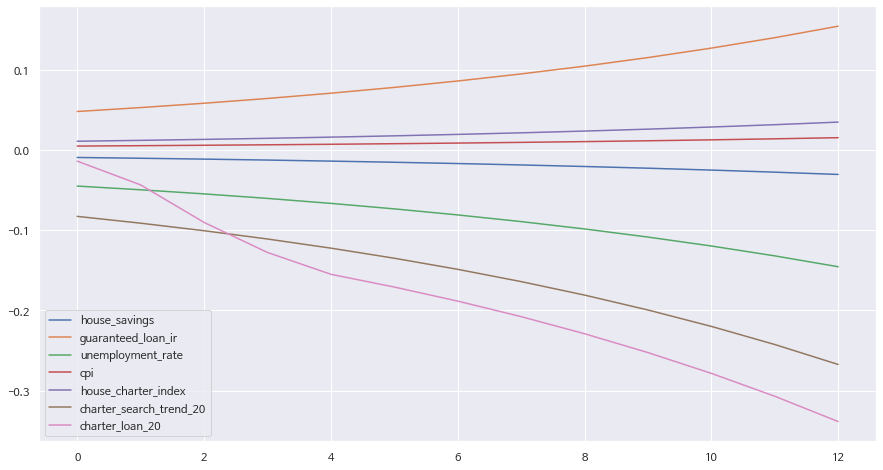

In [ ]:
res.impulse_responses(steps=12).plot(figsize=(15,8))

## Diagnostics

### Testing for nonormality

In [ ]:
#res.test_normality(method='jarquebera')
res.test_normality(method=None)[:,1]

array([2.49890888e-02, 6.95183168e-03, 4.09118116e-01, 9.16891417e-01,
       4.77457694e-01, 6.76160152e-01, 5.03037316e-60])

### Checking for residual autocorrelation

In [ ]:
white_test = vecm_res.test_whiteness(nlags=12, adjusted=True)
white_test.summary()

Test statistic,Critical value,p-value,df
596.4,513.1,0.000,462
